In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord


In [39]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [ ]:
# http://gsaweb.ast.cam.ac.uk/alerts/alert/Gaia20ehk/

In [37]:
#PS1 colors:

g_ps1= 18.9880
r_ps1= 18.0240
i_ps1= 18.1591
i_ps1_err= 0.0074
z_ps1= 17.4470

SkyMapper_r=18.6710
SkyMapper_r_err=0.0780
SkyMapper_i=18.1790
SkyMapper_i_err=0.0630
SkyMapper_z=17.7550
SkyMapper_z_err=0.0800

#2mass: 07472514-3409324
J=16.186
J_err=0.078
H=15.446
H_err=0.085
K=15.408
K_err=0.21


# https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=I/352
dist_bj21 = 3747.37427000 # pc


In [23]:
#  extinctions from here: https://irsa.ipac.caltech.edu/workspace/TMP_7dxj53_7069/DUST/116.85473__-34.15899.v0001/extinction.html
A_g = 4.093
A_r = 2.832
A_i = 2.104
A_z = 1.565
A_J = 0.896
A_H = 0.570
A_K = 0.384

# E(B-V)~1.0639
# EBV = 0.998226 #from TICv8.2

In [7]:
(i_ps1 - A_i) - (J - A_J)
# i_ps1 - J

0.7651000000000003

In [33]:
# the empirical 10D stellar locus
locus_file = '/Users/james/Dropbox/research_projects/old_research/standard_files/wise_locus/table1.txt'
loc10 = pd.read_table(locus_file, delim_whitespace=True, skiprows=10, header=None,names=
                      ('gi','n','ug','ugerr','gr','grerr','ri','rierr','iz','izerr','zj','zjerr','jh','jherr','hk','hkerr'))

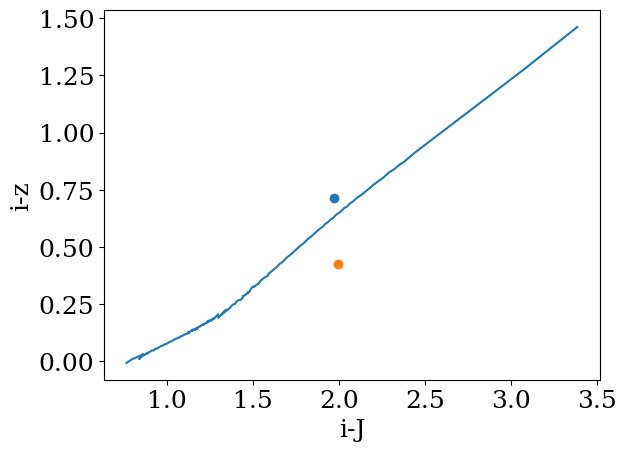

In [70]:
plt.figure()
plt.plot(loc10['iz']+loc10['zj'], loc10['iz'])
plt.xlabel('i-J')
plt.ylabel('i-z')

plt.scatter(i_ps1-J, i_ps1 - z_ps1)
plt.scatter(SkyMapper_i-J, SkyMapper_i-SkyMapper_z)

In [51]:
isoc = pd.read_table('MIST_iso_67620a1e910b3.iso.cmd', delim_whitespace=True)
isoc

,EEP,log10_isochrone_age_yr,initial_mass,star_mass,log_Teff,log_g,log_L,[Fe/H]_init,[Fe/H],SkyMapper_u,SkyMapper_v,SkyMapper_g,SkyMapper_r,SkyMapper_i,SkyMapper_z,phase
0,201,9.2,0.100000,0.100000,3.460235,5.236399,-3.002666,0.0,0.041589,19.131958,18.754421,16.222317,15.167850,12.796049,11.935155,-1.0
1,202,9.2,0.101234,0.101234,3.461097,5.233444,-2.991919,0.0,0.041593,19.076092,18.691284,16.164099,15.112533,12.758807,11.904122,0.0
2,203,9.2,0.105655,0.105655,3.464184,5.222845,-2.953400,0.0,0.041605,18.876955,18.467850,15.957499,14.915839,12.626266,11.793342,0.0
3,204,9.2,0.109873,0.109873,3.467130,5.212735,-2.916653,0.0,0.041620,18.688988,18.258963,15.763958,14.730841,12.501294,11.689314,0.0
4,205,9.2,0.113959,0.113958,3.469983,5.202943,-2.881060,0.0,0.041635,18.509274,18.060732,15.580160,14.554787,12.381742,11.589647,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,1706,9.2,1.861288,0.583720,4.404154,7.892041,-1.116427,0.0,0.057612,9.743304,9.853129,10.021718,10.342033,10.778962,11.086397,6.0
1506,1707,9.2,1.862099,0.583745,4.396648,7.894444,-1.148837,0.0,0.057647,9.798830,9.905536,10.062359,10.380026,10.814570,11.120662,6.0
1507,1708,9.2,1.863005,0.583772,4.389141,7.896817,-1.181219,0.0,0.057688,9.853374,9.956941,10.102131,10.417153,10.849314,11.154061,6.0
1508,1709,9.2,1.864035,0.583803,4.381633,7.899161,-1.213569,0.0,0.057732,9.907181,10.007563,10.141196,10.453552,10.883305,11.186689,6.0


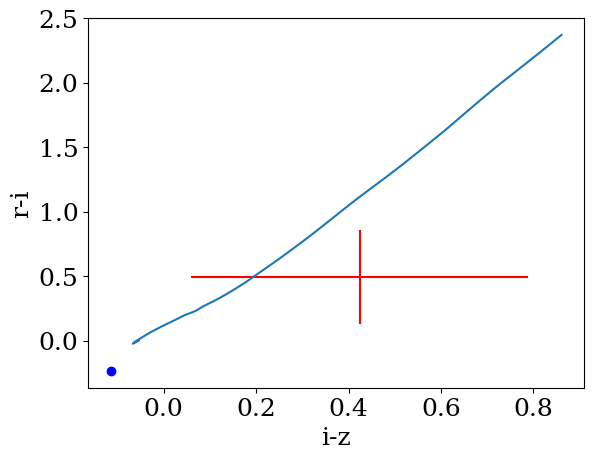

In [68]:
plt.figure()

# plt.plot(loc10['iz'], loc10['ri'])
plt.xlabel('i-z')
plt.ylabel('r-i')

p0 = (isoc['phase'] == 0.) & (isoc['initial_mass'] > 0.1) & (isoc['initial_mass'] < 1.65)

# plt.scatter(i_ps1 - z_ps1, r_ps1-i_ps1)
plt.errorbar(SkyMapper_i-SkyMapper_z, SkyMapper_r-SkyMapper_i, 
             yerr=np.sqrt(SkyMapper_i_err*2 + SkyMapper_r_err**2), 
             xerr=np.sqrt(SkyMapper_i_err*2 + SkyMapper_z_err**2), color='r')

plt.scatter((SkyMapper_i-A_i)-(SkyMapper_z-A_z), (SkyMapper_r-A_r)-(SkyMapper_i-A_i), c='b')

plt.plot(isoc['SkyMapper_i'][p0] - isoc['SkyMapper_z'][p0], 
         isoc['SkyMapper_r'][p0] - isoc['SkyMapper_i'][p0])


Text(0, 0.5, 'g-i')

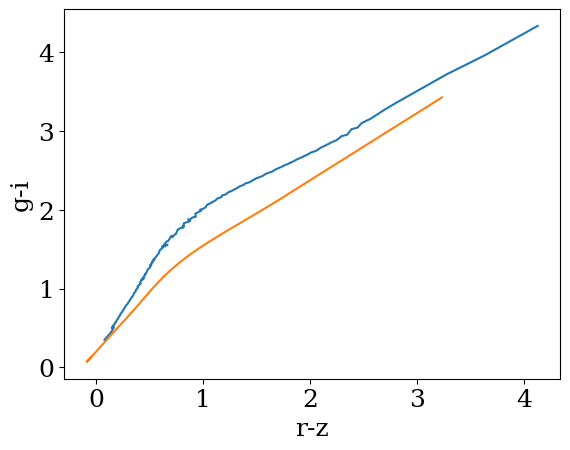

In [69]:
plt.figure()
plt.plot(loc10['ri']+loc10['iz'], loc10['gr']+loc10['ri'])

plt.plot(isoc['SkyMapper_r'][p0] - isoc['SkyMapper_z'][p0], 
         isoc['SkyMapper_g'][p0] - isoc['SkyMapper_i'][p0])

plt.xlabel('r-z')
plt.ylabel('g-i')

# plt.scatter(r_ps1 - z_ps1, g_ps1-i_ps1)

# plt.scatter((g_ps1-A_g) - (i_ps1-A_i), (i_ps1-A_i)-(J-A_J))


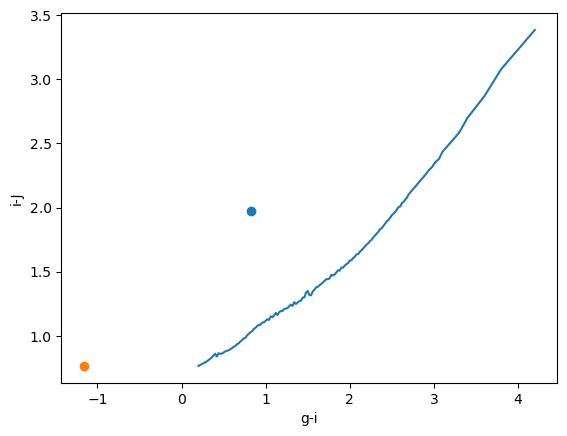

In [32]:
plt.figure()
plt.plot(loc10['gi'], loc10['iz']+loc10['zj'])
plt.xlabel('g-i')
plt.ylabel('i-J')

plt.scatter(g_ps1 - i_ps1, i_ps1-J)
plt.scatter((g_ps1-A_g) - (i_ps1-A_i), (i_ps1-A_i)-(J-A_J))

# plt.plot([0,4],[(i_ps1 - A_i) - (J - A_J), (i_ps1 - A_i) - (J - A_J)],)
# plt.plot([0,4], [i_ps1-J, i_ps1-J])

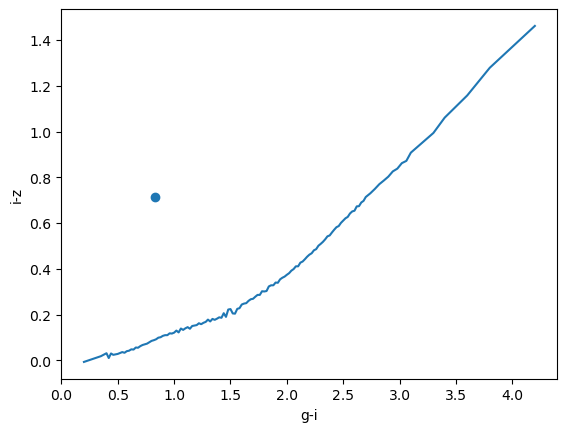

In [22]:
plt.figure()
plt.plot(loc10['gi'], loc10['iz'])
plt.xlabel('g-i')
plt.ylabel('i-z')

plt.scatter(g_ps1 - i_ps1, i_ps1-z_ps1)
plt.scatter(g_ps1 - i_ps1, i_ps1-z_ps1)



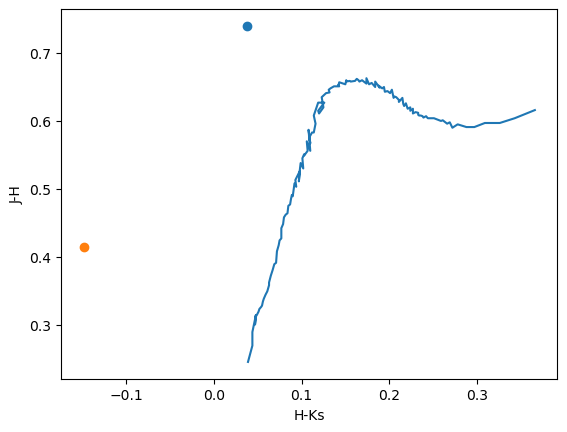

In [31]:

plt.figure()
plt.plot(loc10['hk'],loc10['jh'], )
plt.xlabel('H-Ks')
plt.ylabel('J-H')

plt.scatter(H-K, J-H)
plt.scatter((H-A_H)-(K-A_K), (J-A_J)-(H-A_H))
